# Phân tích doanh thu

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

## Phân tích doanh thu theo tháng

Phân tích doanh thu thực theo tháng giúp đánh giá tổng quan tình hình kinh doanh và phát hiện những xu hướng bất thường trong doanh thu.

### Nhập dữ liệu đầu vào

Trong phần phân tích doanh thu, có 3 bảng dữ liệu cần được sử dụng:
- Bảng orders: bao gồm các dữ liệu về đơn đặt hàng, tình trạng đơn hàng, số lượng sản phẩm...
- Bảng oder_details: bao gồm dữ liệu về giá bán lẻ thực tế, mã sản phẩm...
- Bảng items: bao gồm dữ liệu về mã sản phẩm, loại sản phẩm...

In [2]:
#Nhập các bảng dữ liệu cần thiết
orders_data= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/orders.csv')
ordersdetails_data= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/order_details.csv')
items_data= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/items.csv')

Thực hiện kết hợp các bảng dữ liệu bằng các trường chung để tìm ra mối quan hệ giữa các biến. Ở đây, 3 bảng orders, order_detail và items được kết hợp lần lượt bằng các trường: order_id và id.

In [3]:
#Tạo bảng mới để phân tích doanh thu
joined= pd.merge(orders_data, ordersdetails_data, on='order_id')
joined= pd.merge(joined,items_data,on='id')[['cus_id','order_id','item_id','status','num_of_item','sale_price','category','delivered_at']]
joined.head()

,cus_id,order_id,item_id,status,num_of_item,sale_price,category,delivered_at
0,1,1,27013,Returned,2,9.000000,Tops & Tees,2019-06-08 15:55:00 UTC
1,1,1,22635,Returned,2,54.990002,Tops & Tees,2019-06-08 15:55:00 UTC
2,2,2,14419,Processing,1,58.990002,Tops & Tees,NaN
3,3,3,16443,Complete,3,25.000000,Tops & Tees,2020-06-24 17:28:00 UTC
4,3,3,22932,Complete,3,28.500000,Tops & Tees,2020-06-24 17:28:00 UTC


In [4]:
#Chuyển kiểu dữ liệu thành datetime
joined['delivered_at']= joined['delivered_at'].str.slice(0,7)
joined['delivered_at']= pd.to_datetime(joined['delivered_at'], format='%Y-%m')

Để tìm ra doanh thu thực tế mà doanh nghiệp nhận được từ những đơn hàng, cần lọc ra những đơn hàng ở trạng thái "complete", tức là đã hoàn thành, với thời gian tại cột "delivered_at" chính là thời gian khách hàng nhận được hàng và hoàn tất thanh toán. Cột doanh thu (revenue) được tính bằng tích số của số lượng sản phẩm với giá bán lẻ của chúng. 

In [5]:
#Lọc ra trạng thái đơn hàng Complete
joined = joined[joined['status'] == 'Complete']
#Tạo cột doanh thu
joined['revenue']= joined['num_of_item']*joined['sale_price']
joined.head()

,cus_id,order_id,item_id,status,num_of_item,sale_price,category,delivered_at,revenue
3,3,3,16443,Complete,3,25.000000,Tops & Tees,2020-06-01,75.000000
4,3,3,22932,Complete,3,28.500000,Tops & Tees,2020-06-01,85.500000
5,3,3,25488,Complete,3,39.990002,Tops & Tees,2020-06-01,119.970005
6,3,4,21662,Complete,3,25.000000,Tops & Tees,2021-08-01,75.000000
7,3,4,22679,Complete,3,48.650002,Tops & Tees,2021-08-01,145.950005


In [6]:
#tính tổng doanh thu theo tháng
revenue_by_month= joined.groupby('delivered_at').agg({'revenue':'sum'}).reset_index()

### Trực quan hóa dữ liệu doanh thu theo tháng

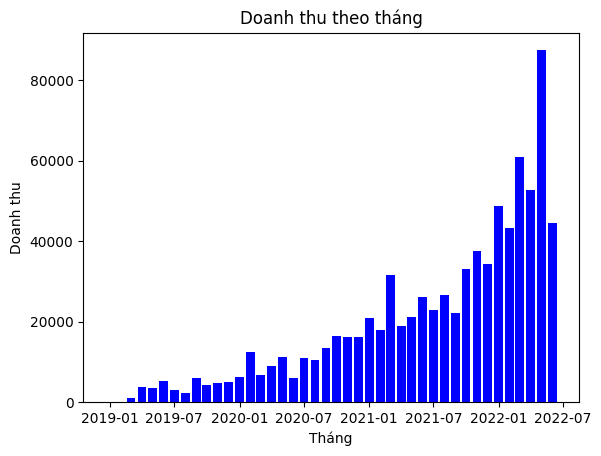

In [7]:
plt.bar(revenue_by_month['delivered_at'], revenue_by_month['revenue'], width=25, color= 'blue')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo tháng')
plt.show()

Biểu đồ cột trên cho thấy rằng, trong giai đoạn từ tháng 1/2019 đến tháng 6/2022, doanh thu của doanh nghiệp có xu hướng tăng nhưng còn biến động. Trong đó, phần lớn các tháng có doanh thu chưa cao. Điều này nêu ra vấn đề: liệu rằng những đơn hàng khách hàng đã đặt có thực sự dẫn đến doanh thu thực cho doanh nghiệp hay không, hay nói cách khác, hành động hủy đơn, đổi trả hàng hay những yếu tố khác về thời gian giao hàng có thể đã tác động đến lượng tiền thực sự doanh nghiệp thu về từ những đơn hàng. Tóm lại, với sự thể hiện doanh thu như trên, tình hình kinh doanh của doanh nghiệp đang không ổn định. Cần xem xét tiếp đến các yếu tố hành vi khách hàng để tìm ra nguyên nhân cho điều này.

## Phân tích doanh thu theo loại sản phẩm

### Trực quan hóa doanh thu theo loại sản phẩm

In [8]:
#tính tổng doanh thu theo loại sản phẩm
revenue_by_item= joined.groupby('category').agg({'revenue':'sum'}).reset_index()

Sử dụng những dữ liệu đã tính toán ở trên để vẽ đồ thị

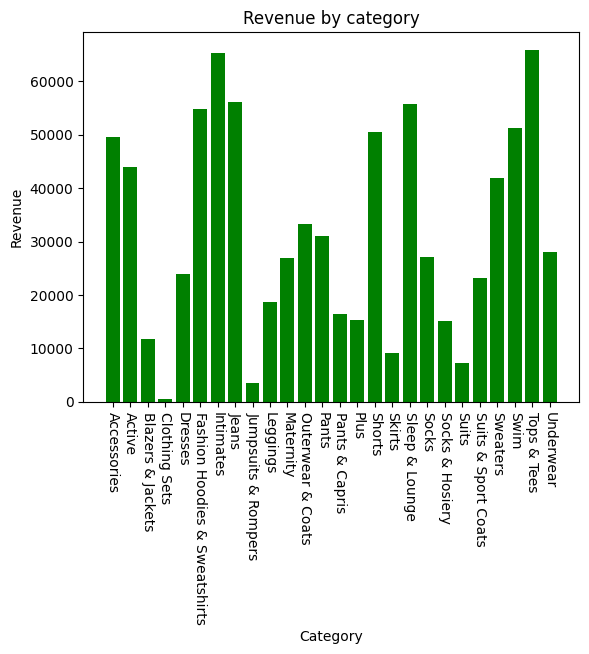

In [9]:
#Vẽ biểu đồ cột
plt.bar(revenue_by_item['category'],revenue_by_item['revenue'], color='green')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Revenue by category')
plt.xticks(rotation=-90)
plt.show()

Doanh thu thực có sự chênh lệch cao giữa các loại sản phẩm. Nguyên nhân tiềm năng cho vấn đề này có thể là do việc khách hàng chỉ mua nhiều 1 số loại sản phẩm nhất định do khách hàng chỉ xem 1 số loại sản phẩm nhất định. Để xem xét nguyên nhân tiềm năng vừa nêu có thực sự dẫn đến mức doanh thu chênh lệch hay không, cần xem xét tiếp đến hành động của khách hàng trên web.